## IBM ML Lab 1


This notebook is based on the first lab from "Machine Learning with Python" by IBM on Coursera. This is my own attempt at doing the labs, without being tempted by the hints and/or solutions. As such, it has extra comments that show my train of thought and reasoning.

In [56]:
#import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

import wget #note, wget must be previously installed on your environment: $ pip install wget

%matplotlib inline

In [57]:
#get the dataset

#there are two different ways you can do this, either by using a wget command, or a python version of that
#for the python version, you will need to import wget (as explained above)
#for the inline version, you will need to install wget by homebrew: $ brew install wget
#I will show both methods :)

#using wget library
file = wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
fuel1 = pd.read_csv(file)


#using wget inline command
!wget -O Fuel.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
#the -O Fuel.csv means: save the file in the hyperlink as 'Fuel.csv'

fuel2 = pd.read_csv('Fuel.csv')

#to compare:
print(fuel1.head())
print(fuel2.head())

#identical XD

--2020-07-14 18:16:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘Fuel.csv’

Fuel.csv            100%[===================>]  70.93K   176KB/s    in 0.4s    

2020-07-14 18:16:54 (176 KB/s) - ‘Fuel.csv’ saved [72629/72629]

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4    

## Data Exploration


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a1e6ed0>,
      dtype=object)

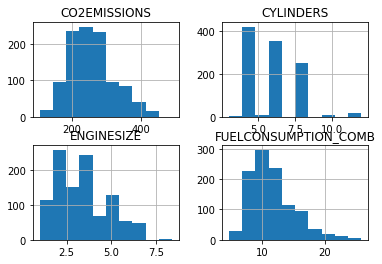

In [58]:
df = fuel1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.hist()
#the outcomes make sense, we don't expect cylinders to have a normal distribtion as you can only get 
#specific cylinder numbers on engines

#the CO2 and Fuel consumption ones seem to be skewed slighlty, meaning that it could affect our regression model

#the one for engine size is quite interesting, it has 3 peaks (likely because it is very much dependent on the cylinders!)


Text(0, 0.5, 'Fuel Consumption')

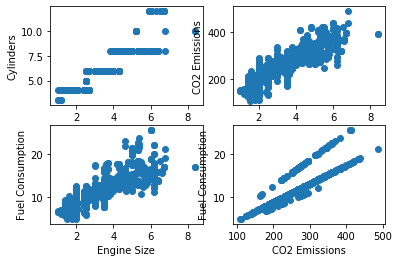

In [59]:
fig = plt.figure()
ax0 = fig.add_subplot(2,2,1)
ax0 = plt.scatter(df.ENGINESIZE, df.CYLINDERS) # we can see from the output, it seems that size of the engine
#really determines the number of cylinders?

plt.xlabel('Engine Size')
plt.ylabel('Cylinders')

ax1 = fig.add_subplot(2,2,2)
ax1 = plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)

plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

ax2 = fig.add_subplot(2,2,3)
ax2 = plt.scatter(df.ENGINESIZE, df.FUELCONSUMPTION_COMB)
plt.xlabel('Engine Size')
plt.ylabel('Fuel Consumption')

ax3 = fig.add_subplot(2,2,4)
ax2 = plt.scatter(df.CO2EMISSIONS, df.FUELCONSUMPTION_COMB)
plt.xlabel('CO2 Emissions')
plt.ylabel('Fuel Consumption')








In [60]:
#creating testing and training data

true_false = np.random.rand(len(df)) < 0.8 #creates a list of true false values (random) where true = 80% 
#of the dataset

train = df[true_false] #creates df of only the training values (i.e. the true values from true_false)
test = df[~true_false] #creates df of the test values


In [61]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() #create lin_reg object
x = train[['ENGINESIZE']]
y = train[['CO2EMISSIONS']]
reg.fit(x,y)
print(reg.coef_,reg.intercept_)

[[39.37222019]] [124.73941942]


the R2 of trained data 0.7609390073997893
mse =  967.8055012237994
mae =  23.443775783553427
[0.56722997]
the R2 of test data 0.7773546488269415
mse =  860.5990258104484
mae =  23.026733669272726
[0.30685529]


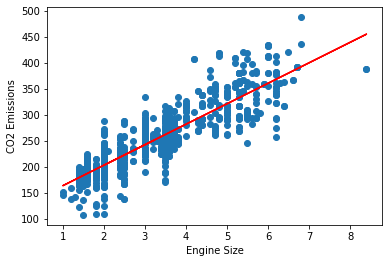

In [62]:
from scipy.stats import skew

#plot results together

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(x,reg.coef_*x + reg.intercept_,color = 'red') #overlay the regression!
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
#looks alright! how about we calculate some metrics?


from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

print('the R2 of trained data',r2_score(y,reg.coef_*x + reg.intercept_))
print('mse = ',mse(y,reg.coef_*x + reg.intercept_))
print('mae = ',mae(y,reg.coef_*x + reg.intercept_))
print(skew(y))
x = test[['ENGINESIZE']]
y = test[['CO2EMISSIONS']]


y_hat = reg.predict(x)
print('the R2 of test data',r2_score(y,y_hat)) #we expect this to be lower
#it happens to be higher... a bit confused by this! NOTE: this reasoning is false. R2 is not a measure of how
#good the model is. We should we comparing MSE or MAE!
print('mse = ',mse(y,y_hat))
print('mae = ',mae(y,y_hat))
print(skew(y))
#It's a bit weird to me that the MSE and MAE of the test data are lower.. shouldn't it be the opposite?

#this may be because our test data is less skewed! Since we started with somewhat skewed data, it was expected
#that our modelling would not be perfect. It may be that the fact that there is a difference in skewness
#between the two datasets is what's causing this disparity.

#either way, it is minimal and thus negligible!

## Conclusion

I did not engage with the dataset much, as I was pressed on time and just wanted to finish. If I come back to this, it would be interesting to see if we could to a multivariate regression on this, and further, if adding any transformations would help solve the skewness problem, and provide a better model. This is interesting.